In [2]:
import cv2 as cv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
e1 = cv.getTickCount()
img=cv.imread("C:\\Users\\ADMIN\\Downloads\\license.jpg")
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()

In [3]:
time

2.7398596

In [4]:
img.shape

(720, 1280, 3)

In [5]:
print( img.size )

2764800


In [6]:
print( img.dtype )

uint8


In [7]:
ex=img[100,150]
print(ex)
blue=img[100,350,1]
print(blue)

[20 26 25]
25


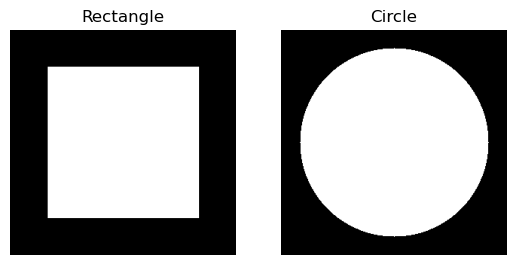

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a black image
img1 = np.zeros((300, 300), dtype="uint8")
img2 = np.zeros((300, 300), dtype="uint8")

# Draw a white rectangle on img1
cv2.rectangle(img1, (50, 50), (250, 250), 255, -1)  # white square

# Draw a white circle on img2
cv2.circle(img2, (150, 150), 125, 255, -1)  # white circle

# Show original shapes
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Rectangle")
plt.imshow(img1, cmap='gray')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Circle")
plt.imshow(img2, cmap='gray')

plt.show()


# Code
    cv2.resize(img, None, fx=0.5, fy=0.5)
    here the img is the source  
    dsize set to None which means the resulted image format (width,height) (it is optional)
    fx and fy is the scale range

In [9]:
#Resizing:
res=cv.resize(img,None,5,5,cv.INTER_CUBIC)
res_rgb = cv.cvtColor(res, cv.COLOR_BGR2RGB)
pil_image = Image.fromarray(res_rgb)
pil_image.show()

# cv.warpaffine(img,matrix,(width,height))

In [10]:
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,500]])
dst = cv.warpAffine(img,M,(cols,rows))
res_img=Image.fromarray(dst)
res_img.show()

# cv.getRotationMatrix2D(center, angle, scale)

# Translation
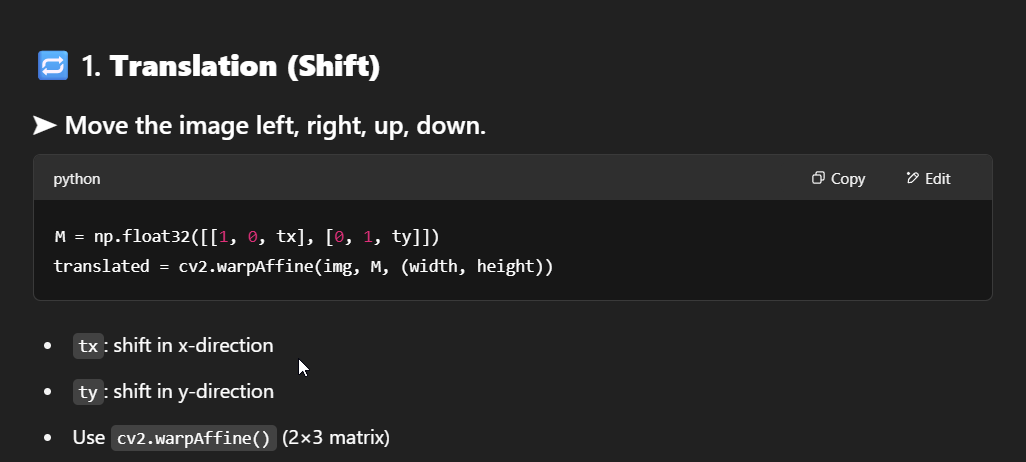

# Rotation
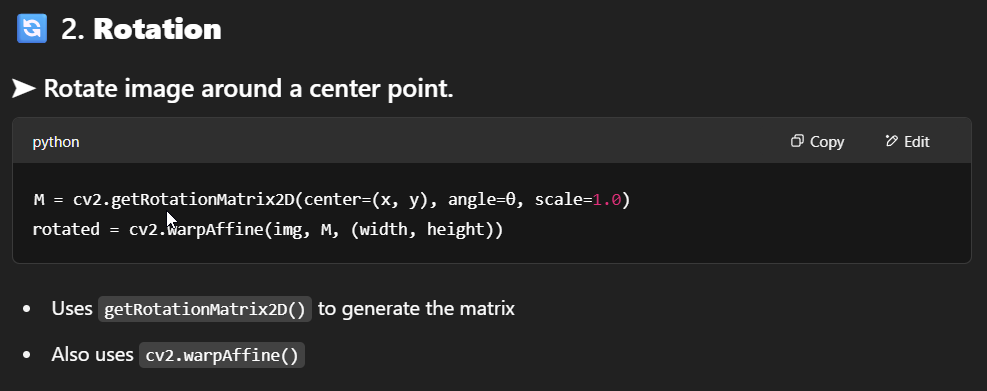

# Resizing:
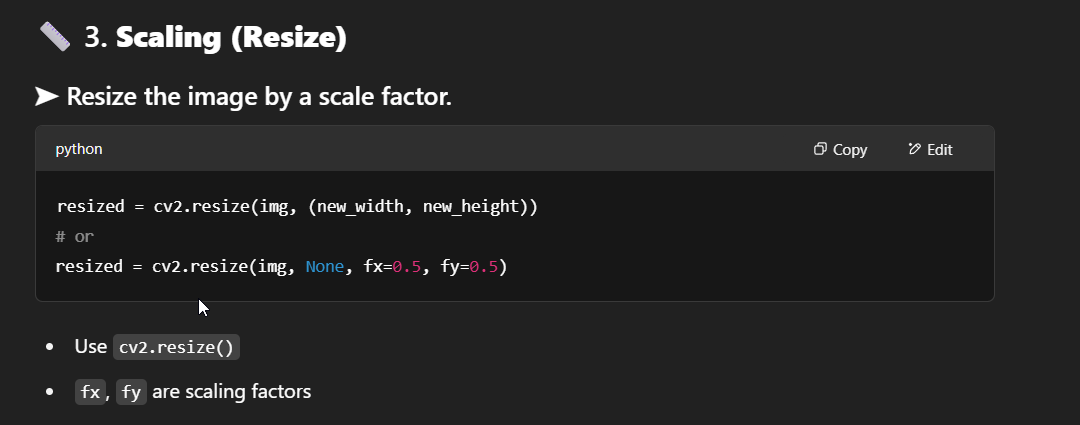

# Skewing:
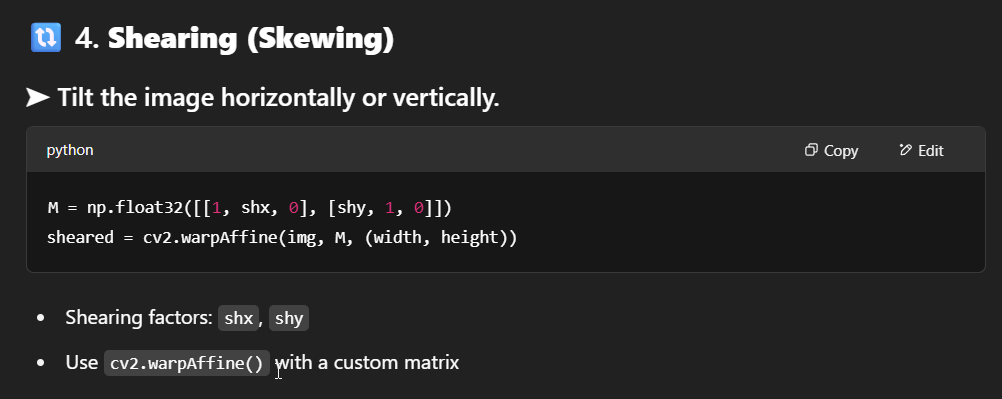

#### Affine transformations preserves parallel lines where Perspective Transformation allows parallel kines to converge and shows a point ina different perspective getaffineTransform() takes 2x3 matrix and perspective takes 3x3 matrix to map the points:

In [11]:
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
res_r=Image.fromarray(dst)
res_r.show()

# adaptive thresholding parameters

#### src,maxvalue,adaptive type (cv2.ADAPTIVE_THRESH_GAUSSIAN_C or cv2.ADAPTIVE_THRESH_MEAN_C), thrteshold type(thresh_bin or thresh_bin_inv), blocksize(must be odd) , c

In [12]:
blurred = cv.bilateralFilter(img, d=9, sigmaColor=600, sigmaSpace=600)
blur_res=Image.fromarray(blurred)
blur_res.show()

In [13]:
#Morphological Transformations:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
cv.imshow('image',erosion)
cv.waitKey(0)
cv.destroyAllWindows()

#### Morphological Transformations namely like Erosion,Dilation, Opening, Closing, Top-hat, Black-hat, Morphological Gradient, use cv.morphologyEx() from Opening operations

In [14]:
opening=cv.morphologyEx(img,cv.MORPH_OPEN,kernel)
cv.imshow('image',erosion)
cv.waitKey(0)
cv.destroyAllWindows()

# Image Gradients: are commonly known as Canny, Laplacian, Prewitts, Scharr, Roberts-cross, Sobel
## Canny underogoes five steps in detecting the edges likely as follows;
    1)Gaussian Noise Removal by blurring Images.
    2)Gradient Computation By Sobel Operators in both x and y directions.
    3)Non-maximum suppression(Getting the Gradient Directions and Magnitude).
    4)Edge detection by matching the threshold.
    5)Hystersis Matching(Finding the Edges which are really edges are not by minimum and maximum thresholding).

In [15]:
can_res=cv.Canny(img,127,200)
cv.imshow('image',can_res)
cv.waitKey(0)
cv.destroyAllWindows()

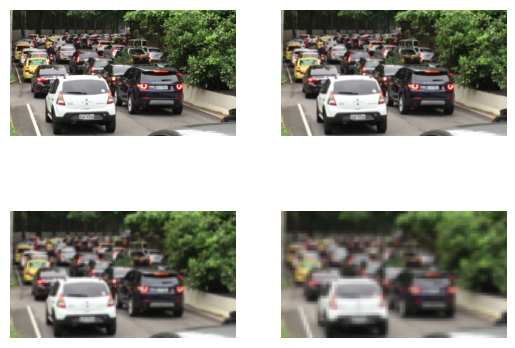

In [16]:
#Image Pyramids:
img1=cv.cvtColor(img,cv.COLOR_BGR2RGB)
layer = img1.copy()
for i in range(4):
    plt.subplot(2, 2, i + 1)
   # using pyrDown() function
    layer = cv.pyrDown(layer)
    plt.imshow(layer)
    plt.axis('off')
    cv.imshow("str(i)", layer)
    cv.waitKey(0)
cv.destroyAllWindows()

#### Contours are simply known as curves which joins the continous points(boundaries) along the image having a same color and intensities. These are very essential and very helpful in identifying in shapes and object tracking.

Contours Approximations:
    Above, we told that contours are the boundaries of a shape with same intensity. It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method.

If you pass cv.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what cv.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory.

Below image of a rectangle demonstrate this technique. Just draw a circle on all the coordinates in the contour array (drawn in blue color). First image shows points I got with cv.CHAIN_APPROX_NONE (734 points) and second image shows the one with cv.CHAIN_APPROX_SIMPLE (only 4 points). See, how much memory it saves!!!



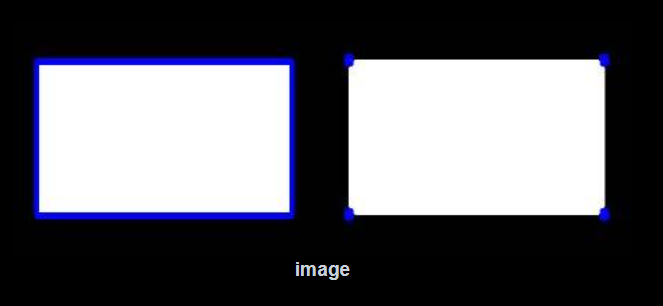

## Moments are the mathematical operators used to track the shape and features like centroid, area these functios process on image at a time by analyzing the image intensites if we want all images we use moments() with for loop.

    for i in contours:
    M = cv.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv.drawContours(image, [i], -1, (0, 255, 0), 2)
        cv.circle(image, (cx, cy), 7, (0, 0, 255), -1)
        cv.putText(image, "center", (cx - 20, cy - 20),
                   cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    print(f"x: {cx} y: {cy}")

because, the central coordinates are the points which actually shows the image central point which are obtained by calculation by diving m10 m01 whch are the (x,y) axes "m00" is the weighted average of contours.

    There are several functions like moments(),area(),arclength(),aproxpolydp() to draw the contours in the image
    1)perimeter = cv.arcLength(cnt,True)
    2)epsilon = 0.1*cv.arcLength(cnt,True)
    approx = cv.approxPolyDP(cnt,epsilon,True)
    3)hull = cv.convexHull(points[, hull[, clockwise[, returnPoints]]])


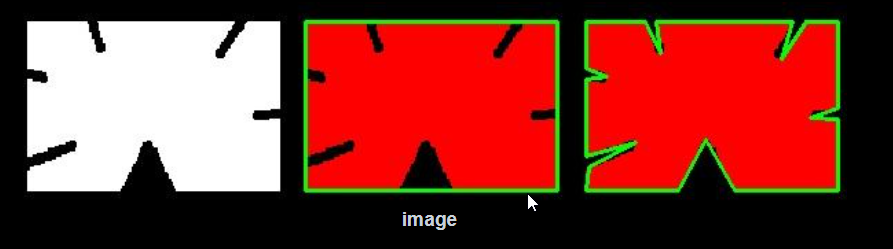

In [7]:
#Contours Detection:
#Moments:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(gray,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )
'''
cv.drawContours(img, cnt, -1, (0,0,255), 1)
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()
'''

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


"\ncv.drawContours(img, cnt, -1, (0,0,255), 1)\ncv.imshow('image',img)\ncv.waitKey(0)\ncv.destroyAllWindows()\n"

# I contour hierarchy there are multiple methods like Tree, List, External, CCoamp
    Tree-Finding the Hierarchial patterns and for tracking internal and external structures
    List-It just returns flattend list with no hierarchial relationship
    External-It returns outer edges and points
    CCOMP-It returns two level hierarchy by maintaining internal and external relationships.
    

### Histogram Syntax
images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

ranges : this is our RANGE. Normally, it is [0,256].

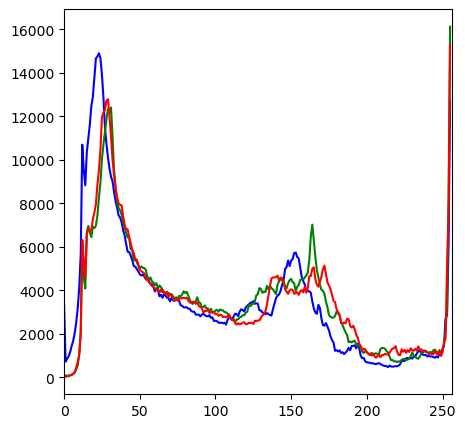

In [18]:
#Histograms:
plt.figure(figsize=(5,5))
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

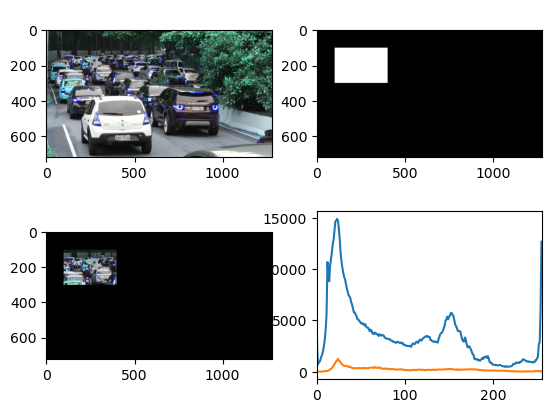

In [19]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
 
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])

plt.axis('off')
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

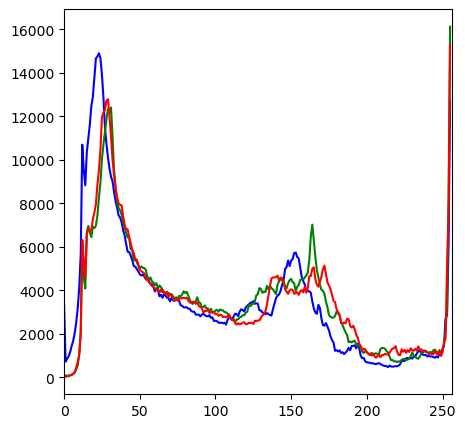

In [20]:
#Histogram Equlization:
pillow_img=Image.fromarray(img)
#pillow_img.show()
color=('b','g','r')
#Global Thresholding:
plt.figure(figsize=(5,5))
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### For 1-D histograms we need to convert BGR image to Grayscale and for 2-D we need to convert int H and S space

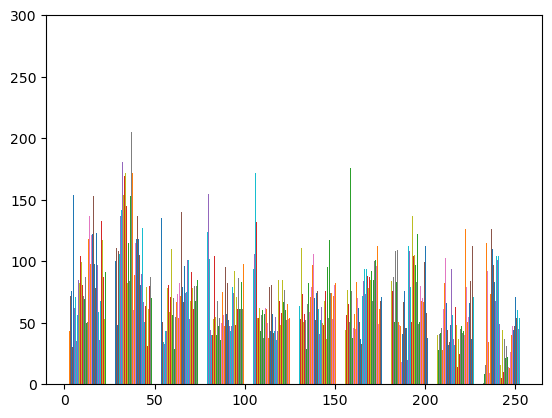

In [21]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)
 
cv.imshow('clahe_2.jpg',cl1)
cv.waitKey(0)
cv.destroyAllWindows()
plt.hist(cl1)
plt.show()

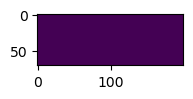

In [22]:
#Histogram Backprojection:
imgregion=img[200:270,1000:1200,:]
img_hsv=cv.cvtColor(imgregion,cv.COLOR_BGR2HSV)
imgregionhist=cv.calcHist([img_hsv],[0,1],None,[180,256],[0,180,0,256])
cv.normalize(imgregionhist,0,255,cv.NORM_MINMAX)
hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)
out=cv.calcBackProject([img_hsv],[0,1],imgregionhist,[0,180,0,256],1)
plt.subplot(233)
plt.imshow(out)
ellipsekernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15))
cv.filter2D(out,-1,ellipsekernel,out)
plt.imshow(out)

In [23]:
img.shape

(720, 1280, 3)

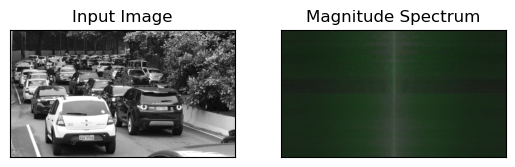

In [24]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
magnitude_spectrum=cv.normalize(magnitude_spectrum,0,255,cv.NORM_MINMAX)
magnitude_spectrum = (magnitude_spectrum * 255).astype(np.uint8)
plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
fshift.shape

(720, 1280, 3)

# The fourier transform transforms the image from spatial domain to frequency domain by computing the fourier
     1)cv.dft() accepts the image in gray scale format with 32bit array and we convert the image int flag name complex output name it can be real and imaginary value.
    2)Obtain the centre of an image
    3)Create a mask with images original shape and then set 60x60 matrix, because it is an low pass filter.
    4)The purpose of 60x60 whic actually means the emprical value for balancing by the low and high frequency
    5)Next step multiplying the mask with the shift to make low frequencies algined in centre.
    6)Inverse the operation to rebuild the image
    7)apply magnitude to get the actual value.

<function matplotlib.pyplot.show(close=None, block=None)>

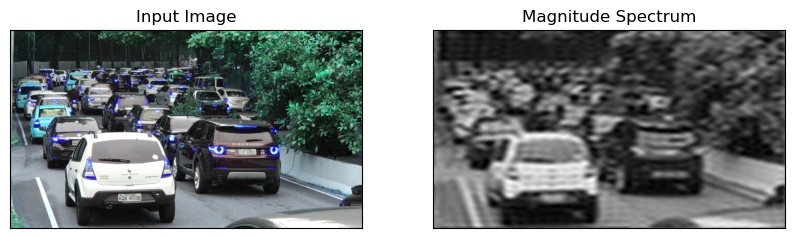

In [26]:
DFT = cv.dft(np.float32(gray), flags=cv.DFT_COMPLEX_OUTPUT)
shift = np.fft.fftshift(DFT)
row, col = gray.shape
center_row, center_col = row // 2, col // 2
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)
imageThen = cv.magnitude(imageThen[:,:,0], imageThen[:,:,1])
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageThen, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show

## Template Matching is a process of searching the specified the template in a image
    use minMaxloc() to get the co-ordinates for single image and by applying simple threshold detect multiple images.  

In [27]:
img2 = img.copy()
template = cv.imread('template.jpg', cv.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)

    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
h,w=gray.shape[::-1]

# Hough Lines:
    1)It takes important two parameters like rho and theta which actually rho means distance from the coordinate origin and theta means angular distance from the coordinates

In [28]:
chess=cv.imread('C:/Users/ADMIN/Downloads/phpZTvydV.png')
chess_edge=cv.Canny(chess,50,100,apertureSize=3)
cv.imshow('image',chess)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
lines = cv.HoughLinesP(chess_edge,10,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(chess,(x1,y1),(x2,y2),(0,0,255),2)
cv.imshow('image',chess)
cv.waitKey(0)
cv.destroyAllWindows()

## Hough Circle Transformation:
### Steps:
    
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
 
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

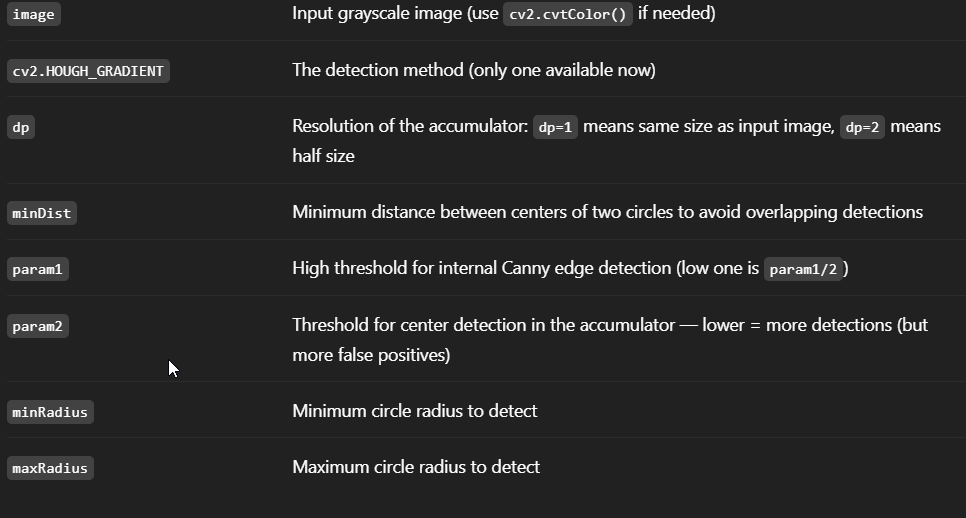

In [3]:
# Step 1: Load the image
image = cv.imread("C:\\Users\\ADMIN\\Downloads\\coin.jpeg")  # Replace with your file path
output = image.copy()

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian Blur to reduce noise
blurred = cv.GaussianBlur(gray, (9, 9), 2)

# Step 4: Apply Hough Circle Transform
circles = cv2.HoughCircles(
    blurred,                   # Input image
    cv2.HOUGH_GRADIENT,        # Detection method
    dp=1.2,                    # Inverse ratio of accumulator resolution
    minDist=40,                # Minimum distance between detected centers
    param1=100,                # High threshold for Canny edge detector
    param2=30,                 # Accumulator threshold for circle detection
    minRadius=10,              # Minimum circle radius
    maxRadius=60               # Maximum circle radius
)

# Step 5: Draw circles if any detected
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv.circle(output, (x, y), r, (0, 0, 255), 2)  # Draw red circle

# Step 6: Show the output
cv2.imshow("Detected Coins", output)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined

In [ ]:
# After thresholding...
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    area = cv.contourArea(cnt)
    if area > 500:  # ignore small noise
        (x, y), radius = cv.minEnclosingCircle(cnt)
        cv.circle(output, (int(x), int(y)), int(radius), (0, 0, 255), 2)
cv2.imshow("Watershed Coin Segmentation", output)
cv2.waitKey(0)
cv2.destroyAllWindows()


# GrabCut Algorithm:
    img - Input image
    mask - It is a mask image where we specify which areas are background, foreground or probable background/foreground etc. It is done by the following flags, cv.GC_BGD, cv.GC_FGD, cv.GC_PR_BGD, cv.GC_PR_FGD, or simply pass 0,1,2,3 to image.
    rect - It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
    bdgModel, fgdModel - These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).
    iterCount - Number of iterations the algorithm should run.
    mode - It should be cv.GC_INIT_WITH_RECT or cv.GC_INIT_WITH_MASK or combined which decides whether we are drawing rectangle or final touchup strokes.
Go with INIT_WITH_RECT with hardcorded foreground and background or you take a grasp at INIT_WITH_MASK customize the foreground and background with customized matrix construction

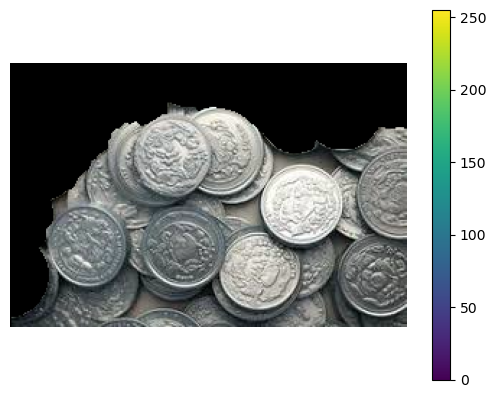

((-0.5, 274.5, 182.5, -0.5), None)

In [2]:
#Grabcut algorithm:
img = cv.imread("C:\\Users\\ADMIN\\Downloads\\coin.jpeg")
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (1,3,274,180)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar()
plt.axis('off'),plt.show()

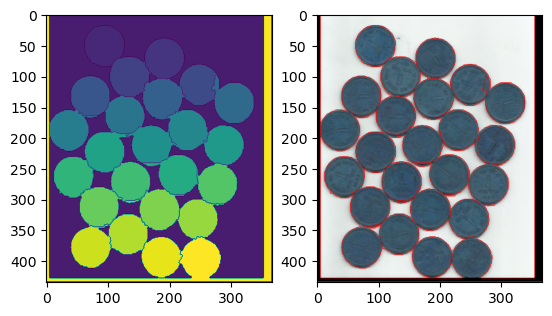

In [5]:
img = cv.imread("C:/Users/ADMIN/OneDrive/Documents/ShareX/Screenshots/2025-06/chrome_fHCs90Rupc.png")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(1,2,1)
plt.imshow(markers)
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

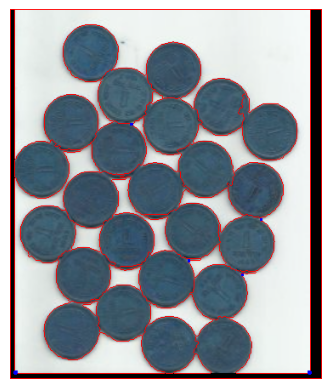

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1cb66e0a690>, None)

In [6]:
#Harris Corner:
input_img=np.float32(gray)
haris=cv.cornerHarris(input_img,3,3,0.08)
dst=cv.dilate(haris,None)
img[dst>0.01*dst.max()]=(0,0,255)
plt.axis('off'),plt.imshow(img),plt.show()

### Here the cornerSubPix() is a method to detect the corners centroids to get the efficiency in detecting the corners on comparing to Harris Corner by finding the subpixel accuracy inn the image.
    1)ret - is the labels denoting the background
    2)labels - matrix which defines the labels 
    3)stats - maintaining and capturing the bounding boxes
    4)centroids - captures the centroids of the corners.
We need to set the criteria to stop by setting the maximum iterations to 100 and making epsilon for tolerance.

In [7]:
# Threshold and convert to uint8 binary image (IMPORTANT)
threshold = 0.01 * dst.max()
binary_dst = np.uint8(dst > threshold)

# Now it is safe to use connectedComponentsWithStats
ret, labels, stats, centroids = cv.connectedComponentsWithStats(binary_dst)

# Optional: refine corners using cornerSubPix
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)

# Show results
for i in range(1, len(corners)):  # skip background label 0
    x, y = corners[i]
    cv.circle(img, (int(x), int(y)), 4, (0, 255,0 ), -1)

cv.imshow('Harris Corners + SubPix', img)
cv.waitKey(0)
cv.destroyAllWindows()

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1cb6996db50>)

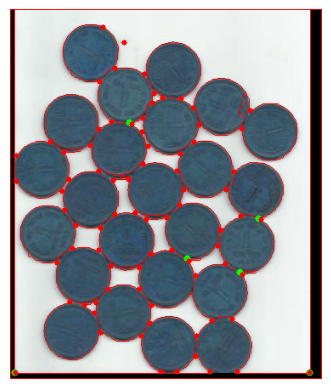

In [8]:
#Shi-Thomasi:
corners=cv.goodFeaturesToTrack(gray,1000,0.01,10)
corners=np.intp(corners)
for i in corners:
    x,y=i.ravel()
    cv.circle(img,(x,y),3,(255,0,0),-1)
plt.axis('off'),plt.imshow(img)

# Algorithmic Steps:
    Key Steps in SIFT:
        1)Scale-Space Extrema Detection: Identify potential keypoints by searching for local extrema in a series of Gaussian-blurred images at different scales.
        2)Keypoint Localization: Refine the detected keypoints by fitting a detailed model to determine their precise location, scale, and contrast.
        3)Orientation Assignment: Assign an orientation to each keypoint based on the gradient directions of the image, ensuring rotation invariance.
        4)Keypoint Descriptor: Create a descriptor for each keypoint by considering the gradient magnitudes and orientations within a region around the keypoint, forming a 128-dimensional vector.
## Parameters
    1)nfeatures - the number of features to be retained.
    2)nOctavelayers - numbers to pyramids.
    3)contrastthreshold - filtering out the weak points
    4)edgethreshold - filters the edges to retain more efficiency and faster accuracy.
    5sigma - Gaussian to be applied in the process of applying the Gaussian filter.

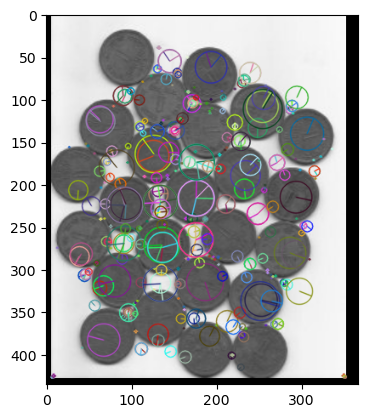

In [9]:
#SIFT:
#sift = cv.SIFT_create()
sift = cv.SIFT_create(nfeatures=1000,nOctaveLayers=10,contrastThreshold=0.03,edgeThreshold=5,sigma=1.2)
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread('./images/face1.jpeg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)
<matplotlib.image.AxesImage at 0x7f9694f07358>

Detect keypoints and Create Descriptor
surf = cv2.xfeatures2d.SURF_create(800)

train_keypoints, train_descriptor = surf.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = surf.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))
Number of Keypoints Detected In The Training Image:  150
Number of Keypoints Detected In The Query Image:  53

Matching Keypoints
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SURF descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

# FAST(Features from Accelerated Segmented Test) Algorithm to Track:

In [10]:
fast = cv.FastFeatureDetector_create(threshold=100,nonmaxSuppression=True)
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
 
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
 
cv.imwrite('fast_true.png', img2)
 
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
 
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
 
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
 
cv.imshow('fast_false.png', img3)
cv.waitKey(0)
cv.destroyAllWindows()

Threshold: 100
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 39
Total Keypoints without nonmaxSuppression: 77


In [11]:
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
 
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
 
# find the keypoints with STAR
kp = star.detect(img,None)
 
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
 
print( brief.descriptorSize() )
print( des.shape )

32
(208, 32)


## BRIEF is a feature descriptor that detects the feature vectors form the obtained keypoints.

In [12]:
star = cv.xfeatures2d.StarDetector_create()
 
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
 
# find the keypoints with STAR
kp = star.detect(img,None)
 
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
 
print( brief.descriptorSize() )
print( des.shape )

32
(208, 32)


## Keypoints about ORB:
    ORB is a fusion of FAST keypoint detector and BRIEF descriptor with some added features to improve the performance. FAST is Features from Accelerated Segment Test used to detect features from the provided image. It also uses a pyramid to produce multiscale-features. Now it doesn’t compute the orientation and descriptors for the features, so this is where BRIEF comes in the role.

    ORB uses BRIEF descriptors but as the BRIEF performs poorly with rotation. So what ORB does is to rotate the BRIEF according to the orientation of keypoints. Using the orientation of the patch, its rotation matrix is found and rotates the BRIEF to get the rotated version. ORB is an efficient alternative to SIFT or SURF algorithms used for feature extraction, in computation cost, matching performance, and mainly the patents. SIFT and SURF are patented and you are supposed to pay them for its use. But ORB is not patented.

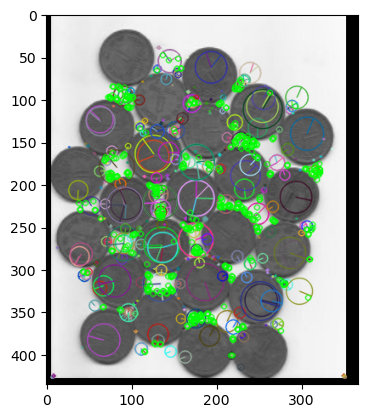

(<matplotlib.image.AxesImage at 0x1cb693f3050>, None)

In [13]:
orb = cv.ORB_create()
 
# find the keypoints with ORB
kp = orb.detect(img,None)
 
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
 
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

## Keypoints:
    Actually keypoints are the points which are actually used to locate the features that are invariant to scale,orientation(rotation),and lighting conditions. These are the points which are very helpful in indentifing the images even when they are invariants from the trained images by indentifying the angles(gradient direction), and scale.
## Descriptors:
    Descriptors are the ones which are extracted from the local patches of images by either by using gradients(SIFT, SURF) or by intensities (BRIEF) it must be stay consistent even if the image gone rotation or scaled.

## Parameters:
    cv2.ORB_create(
    nfeatures=500,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20
    )


# TIP:
    For SIFT and SURF we use cv.NORM_L1 we can also use cv.NORM_L2 for string based desriptors like ORB, BRIEF, or we can use cv.HAMMING2

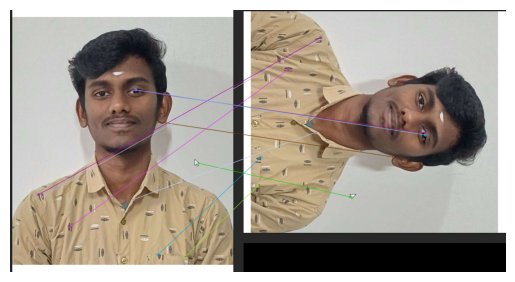

In [3]:
img1=cv.imread("C:\\Users\\ADMIN\\OneDrive\\Documents\\ShareX\\Screenshots\\2025-06\\chrome_62nSH6g3hh.png")
img2=cv.imread(r"C:\Users\ADMIN\OneDrive\Documents\ShareX\Screenshots\2025-06\rotated.png")

orb = cv.ORB_create()
 
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_HAMMING2, crossCheck=True)
 
# Match descriptors.
matches = bf.match(des1,des2)
 
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

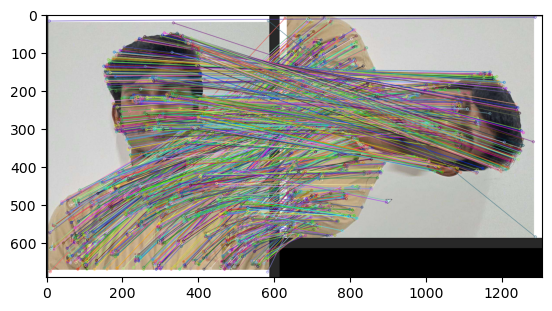

In [4]:

sift = cv.SIFT_create()
 
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
 
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
 
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
 
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB))
plt.show()

# Explination:
    KDTREE is often referred as index 1 for SIFT/SURF descriptors like np.float32() and requires knn.match() to match the neighbours typically used in high dimensional data typically used to get the neighbours or we can use LSH(Locality Sensitive Hashing) which is used to to hash the values by int class probablities and use HAMMING distance for BRIEF, ORB, BRISK np.uint() and NORM(Eucledian) for SIFT/SURF methods.
    And here the points are located in the order of by each point followed by lowies ratio in descending manner
    Two types of Matches namely,
        1)BRUTE
        2)FLANN

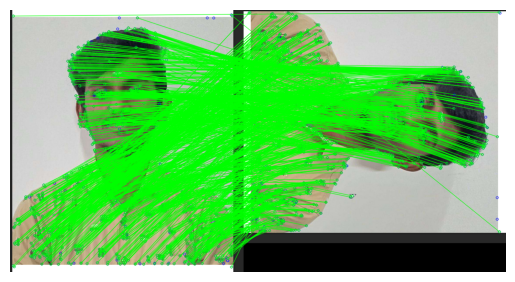

In [6]:
sift = cv.SIFT_create()
 
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
 
# FLANN parameters
FLANN_INDEX_KDTREE =5
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
 
flann = cv.FlannBasedMatcher(index_params,search_params)
 
matches = flann.knnMatch(des1,des2,k=2)
 
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
 
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
 
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
 
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
 
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

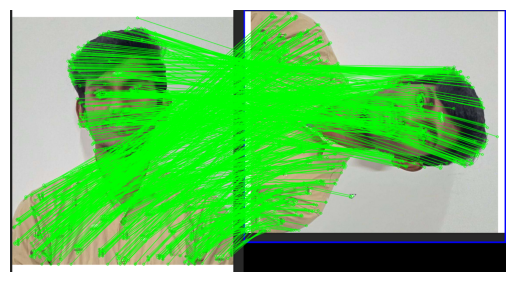

In [17]:
sift = cv.SIFT_create()
MIN_MATCH_COUNT=10
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
 
FLANN_INDEX_KDTREE = 5
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
 
flann = cv.FlannBasedMatcher(index_params, search_params)
 
matches = flann.knnMatch(des1,des2,k=2)
 
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
 
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
 
    h,w,c = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
 
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
 
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
 
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
 
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [28]:
a=np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
a.shape

(948, 1, 2)